# Venmo/Credit Card Fraud Detection

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

file_path = 'card_transdata.csv'
df = pd.read_csv(file_path)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
#getting simple statistics about the data we collected
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [21]:
# Before checking for the percentage we need to make sure there are no null values within the dataset
df.isnull().sum().max()

np.int64(0)

Not Frauds: 91.26 % of the dataset
Frauds: 8.74 % of the dataset


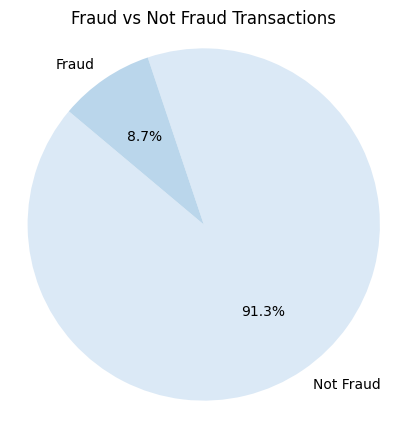

In [24]:
# here we can compare and visualize the difference in percentage of the split between frauds and valid transactions
# Calculate percentages assuming 'fraud' column exists
not_frauds_percent = round(df['fraud'].value_counts()[0] / len(df) * 100, 2)
frauds_percent = round(df['fraud'].value_counts()[1] / len(df) * 100, 2)

# Print percentages
print('Not Frauds:', not_frauds_percent, '% of the dataset')
print('Frauds:', frauds_percent, '% of the dataset')

fraud_counts = df['fraud'].value_counts()

# Map numeric labels to descriptive labels
fraud_counts.index = fraud_counts.index.map({0: 'Not Fraud', 1: 'Fraud'})

# Plotting a pie chart with elegant shades of blue
plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues'))
plt.title('Fraud vs Not Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
# Next we can drop duplicate values in case they exist, so we do not have skewed results

# mention the len of the df before and after
print("Count of data before removing duplicates:", len(df))
df = df.copy()

# Remove duplicates inplace
df.drop_duplicates(inplace=True)
print("Duplicates removed successfully.")

# Print the count of data after removing duplicates
print("Count of data after removing duplicates:", len(df))
print("In this case there is none")


Count of data before removing duplicates: 1000000
Duplicates removed successfully.
Count of data after removing duplicates: 1000000
In this case there is none
